In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [6]:
# Specify data paths
dataset = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint.csv'
model_save_path = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [7]:
# Change training classes if necessary
NUM_CLASSES = 10

# Dataset reading

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([105,  93,  90, 272, 237, 357, 230, 556, 121, 295]))


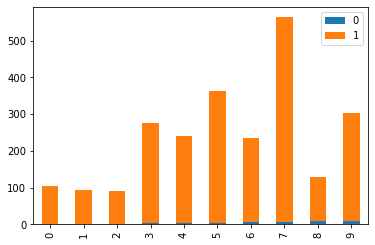

In [11]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [15]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3810 - accuracy: 0.0781
Epoch 00001: val_loss improved from inf to 2.15775, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 5ms/step - loss: 2.2605 - accuracy: 0.1975 - val_loss: 2.1577 - val_accuracy: 0.3073
Epoch 2/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.1308 - accuracy: 0.4375
Epoch 00002: val_loss improved from 2.15775 to 2.03105, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 2.0917 - accuracy: 0.3101 - val_loss: 2.0310 - val_accuracy: 0.2784
Epoch 3/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.9129 - accuracy: 0.3438
Epoch 00003: val_loss improved from 2.03105 to 1.91437, saving model to 

Epoch 21/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0814 - accuracy: 1.0000
Epoch 00021: val_loss improved from 0.07864 to 0.07104, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9960 - val_loss: 0.0710 - val_accuracy: 0.9932
Epoch 22/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0548 - accuracy: 1.0000
Epoch 00022: val_loss improved from 0.07104 to 0.05850, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9972 - val_loss: 0.0585 - val_accuracy: 0.9983
Epoch 23/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0536 - accuracy: 0.9844
Epoch 00023: val_loss improved from 0.05850 to 0.05644, saving mo

Epoch 41/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 00041: val_loss improved from 0.01179 to 0.00999, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0100 - val_accuracy: 0.9983
Epoch 42/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 00042: val_loss did not improve from 0.00999
28/28 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9994 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 43/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 00043: val_loss improved from 0.00999 to 0.00898, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [=======

28/28 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 64/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00064: val_loss did not improve from 0.00362
28/28 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 65/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 00065: val_loss did not improve from 0.00362
28/28 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 66/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00066: val_loss improved from 0.00362 to 0.00315, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [====================

Epoch 89/1000
 1/28 [>.............................] - ETA: 0s - loss: 7.5031e-04 - accuracy: 1.0000
Epoch 00089: val_loss improved from 0.00158 to 0.00145, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 90/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.00145
28/28 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 91/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00091: val_loss improved from 0.00145 to 0.00140, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [===

 1/28 [>.............................] - ETA: 0s - loss: 2.5290e-04 - accuracy: 1.0000
Epoch 00115: val_loss did not improve from 0.00092
28/28 [==============================] - 0s 1ms/step - loss: 6.3884e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 116/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.9950e-04 - accuracy: 1.0000
Epoch 00116: val_loss improved from 0.00092 to 0.00084, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 6.4014e-04 - accuracy: 1.0000 - val_loss: 8.3654e-04 - val_accuracy: 1.0000
Epoch 117/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.9538e-04 - accuracy: 1.0000
Epoch 00117: val_loss did not improve from 0.00084
28/28 [==============================] - 0s 1ms/step - loss: 5.8958e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 118/1

Epoch 141/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.9858e-04 - accuracy: 1.0000
Epoch 00141: val_loss did not improve from 0.00048
28/28 [==============================] - 0s 1ms/step - loss: 3.4728e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 142/1000
 1/28 [>.............................] - ETA: 0s - loss: 8.8227e-04 - accuracy: 1.0000
Epoch 00142: val_loss did not improve from 0.00048
28/28 [==============================] - 0s 1ms/step - loss: 3.7692e-04 - accuracy: 1.0000 - val_loss: 6.6253e-04 - val_accuracy: 1.0000
Epoch 143/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.4626e-04 - accuracy: 1.0000
Epoch 00143: val_loss did not improve from 0.00048
28/28 [==============================] - 0s 1ms/step - loss: 3.2984e-04 - accuracy: 1.0000 - val_loss: 7.0711e-04 - val_accuracy: 1.0000
Epoch 144/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.8965e-04 - accuracy: 1.0000
Epoch 00144: val_loss did not im

 1/28 [>.............................] - ETA: 0s - loss: 1.0618e-04 - accuracy: 1.0000
Epoch 00167: val_loss did not improve from 0.00035
28/28 [==============================] - 0s 1ms/step - loss: 2.3684e-04 - accuracy: 1.0000 - val_loss: 3.8751e-04 - val_accuracy: 1.0000
Epoch 168/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.1831e-04 - accuracy: 1.0000
Epoch 00168: val_loss improved from 0.00035 to 0.00034, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 2.7691e-04 - accuracy: 1.0000 - val_loss: 3.4036e-04 - val_accuracy: 1.0000
Epoch 169/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.5494e-04 - accuracy: 1.0000
Epoch 00169: val_loss did not improve from 0.00034
28/28 [==============================] - 0s 1ms/step - loss: 2.0122e-04 - accuracy: 1.0000 - val_loss: 3.5761e-04 - val_accuracy: 1.0000
Epo

Epoch 193/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.0836e-04 - accuracy: 1.0000
Epoch 00193: val_loss did not improve from 0.00020
28/28 [==============================] - 0s 1ms/step - loss: 1.2072e-04 - accuracy: 1.0000 - val_loss: 2.9660e-04 - val_accuracy: 1.0000
Epoch 194/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.5481e-05 - accuracy: 1.0000
Epoch 00194: val_loss did not improve from 0.00020
28/28 [==============================] - 0s 1ms/step - loss: 1.2045e-04 - accuracy: 1.0000 - val_loss: 2.7986e-04 - val_accuracy: 1.0000
Epoch 195/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.3627e-04 - accuracy: 1.0000
Epoch 00195: val_loss did not improve from 0.00020
28/28 [==============================] - 0s 1ms/step - loss: 1.1924e-04 - accuracy: 1.0000 - val_loss: 4.8217e-04 - val_accuracy: 1.0000
Epoch 196/1000
 1/28 [>.............................] - ETA: 0s - loss: 7.7449e-05 - accuracy: 1.0000
Epoch 00196: val_loss improv

Epoch 220/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.5961e-05 - accuracy: 1.0000
Epoch 00220: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 8.7452e-05 - accuracy: 1.0000 - val_loss: 1.9576e-04 - val_accuracy: 1.0000
Epoch 221/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.6030e-05 - accuracy: 1.0000
Epoch 00221: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 8.2952e-05 - accuracy: 1.0000 - val_loss: 2.2925e-04 - val_accuracy: 1.0000
Epoch 222/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.2339e-04 - accuracy: 1.0000
Epoch 00222: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 7.9991e-05 - accuracy: 1.0000 - val_loss: 2.1433e-04 - val_accuracy: 1.0000
Epoch 223/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.1849e-05 - accuracy: 1.0000
Epoch 00223: val_loss did no

 1/28 [>.............................] - ETA: 0s - loss: 4.2404e-05 - accuracy: 1.0000
Epoch 00248: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 5.5290e-05 - accuracy: 1.0000 - val_loss: 1.6372e-04 - val_accuracy: 1.0000
Epoch 249/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.6193e-05 - accuracy: 1.0000
Epoch 00249: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 5.5994e-05 - accuracy: 1.0000 - val_loss: 1.9864e-04 - val_accuracy: 1.0000
Epoch 250/1000
 1/28 [>.............................] - ETA: 0s - loss: 4.3118e-05 - accuracy: 1.0000
Epoch 00250: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 5.3978e-05 - accuracy: 1.0000 - val_loss: 1.5864e-04 - val_accuracy: 1.0000
Epoch 251/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.3399e-05 - accuracy: 1.0000
Epoch 00251: val_loss did not improve from 

In [17]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [18]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

10/10 [==============================] - 0s 553us/step - loss: 1.3377e-04 - accuracy: 1.0000


In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.7764292e-19 6.5413372e-25 9.7947839e-12 1.5037112e-14 9.9999952e-01
 2.7355425e-08 4.6255309e-07 1.9105779e-10 4.3150247e-10 5.7190525e-10]
4


# Confusion matrix

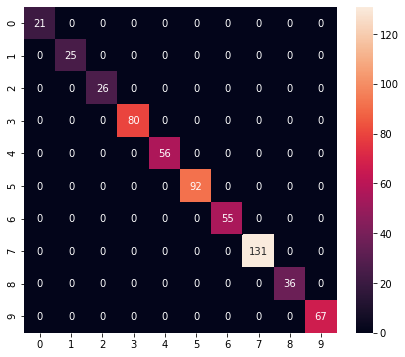

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        67

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7568

## Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 752 µs, sys: 229 µs, total: 981 µs
Wall time: 648 µs


In [27]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.74069484e-19 7.23921826e-25 1.09116665e-11 1.55253330e-14
 9.99999404e-01 2.51912411e-08 5.59730836e-07 1.79784021e-10
 4.12852086e-10 5.31583721e-10]
4
